In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
# Define the ticker symbol for S&P 500 (SPY)
ticker_symbol = "^GSPC"

# Define the start and end dates for the historical data
start_date = "2000-01-01"
end_date = "2023-05-31"

# Download the historical data
SandP = yf.download(ticker_symbol, start=start_date, end=end_date)
SandP = pd.DataFrame(SandP)
# Print the downloaded data
SandP['LogIncremnetsClose'] = np.log(SandP['Close']).diff()
SandP

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,LogIncremnetsClose
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.039099
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001920
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000955
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.026730
...,...,...,...,...,...,...,...
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000,-0.011285
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000,-0.007346
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000,0.008719


In [27]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols for U.S. Treasury bonds
ticker_1yr = "^IRX"  # 1-year Treasury bond
ticker_10yr = "^TNX"  # 10-year Treasury bond
ticker_30yr = "^TYX"  # 30-year Treasury bond

# Download the historical data for 1-year Treasury bond
data_1yr = yf.download(ticker_1yr, start=start_date, end=end_date)

# Download the historical data for 10-year Treasury bond
data_10yr = yf.download(ticker_10yr, start=start_date, end=end_date)

# Download the historical data for 30-year Treasury bond
data_30yr = yf.download(ticker_30yr, start=start_date, end=end_date)

# Create a DataFrame for 1-year Treasury yields
df_1yr = pd.DataFrame(data_1yr)
df_1yr.rename(columns={'Close': '1yr Yield'}, inplace=True)

# Create a DataFrame for 10-year Treasury yields
df_10yr = pd.DataFrame(data_10yr)
df_10yr.rename(columns={'Close': '10yr Yield'}, inplace=True)

# Create a DataFrame for 30-year Treasury yields
df_30yr = pd.DataFrame(data_30yr)
df_30yr.rename(columns={'Close': '30yr Yield'}, inplace=True)

# Merge the DataFrames
yields = pd.concat([df_1yr['1yr Yield'], df_10yr['10yr Yield'], df_30yr['30yr Yield']], axis=1)
yields = pd.DataFrame(yields)
# Print the DataFrame
yields['LogIncremnets1yr'] = np.log(yields['1yr Yield']).diff()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\Shark\OneDrive\Desktop\MasterThesis\.venv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
merged = pd.merge(yields, SandP['LogIncremnetsClose'], how='left', left_index=True, right_index=True)
merged.dropna(inplace=True)

In [29]:
np.corrcoef(merged['LogIncremnetsClose'], merged['1yr Yield'])[0,1]

-0.013881399973117414

In [30]:
np.corrcoef(merged['LogIncremnetsClose'], merged['10yr Yield'])[0,1]

-0.017642709847259967

In [31]:
np.corrcoef(merged['LogIncremnetsClose'], merged['30yr Yield'])[0,1]

-0.013084635395861986

<Axes: xlabel='LogIncremnetsClose', ylabel='1yr Yield'>

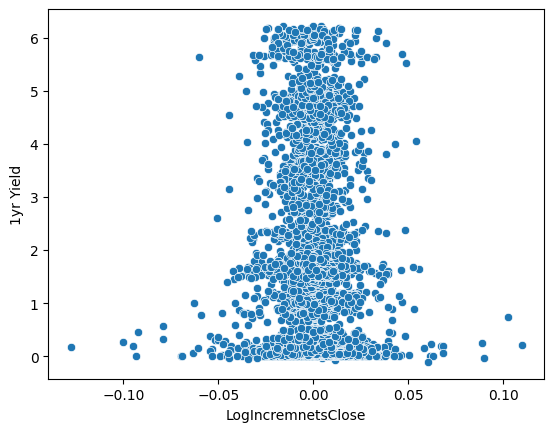

In [25]:
import seaborn as sns
sns.scatterplot(x=merged['LogIncremnetsClose'], y=merged['1yr Yield'])

<Axes: xlabel='LogIncremnetsClose', ylabel='LogIncremnets1yr'>

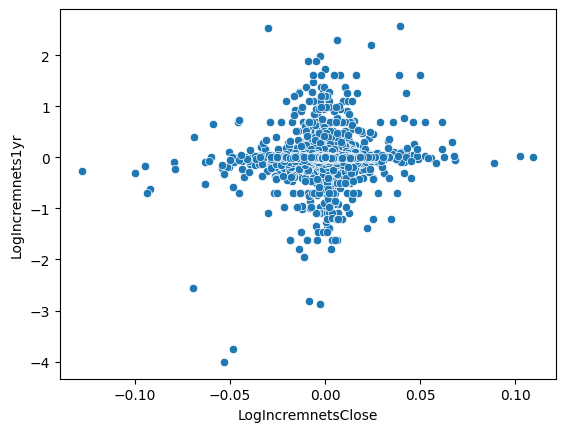

In [32]:
sns.scatterplot(x=merged['LogIncremnetsClose'], y=merged['LogIncremnets1yr'])